In [1]:
from transformers import pipeline
from transformers import AutoTokenizer, AutoModelForSequenceClassification
from transformers import DistilBertTokenizerFast, DistilBertForSequenceClassification
from transformers import BertForQuestionAnswering
from transformers import TrainingArguments, Trainer
import torch
import torch.nn.functional as F
from pathlib import Path
from datasets import Dataset

### See the Transformers webpage for many of thes models: https://huggingface.co/docs/transformers/index

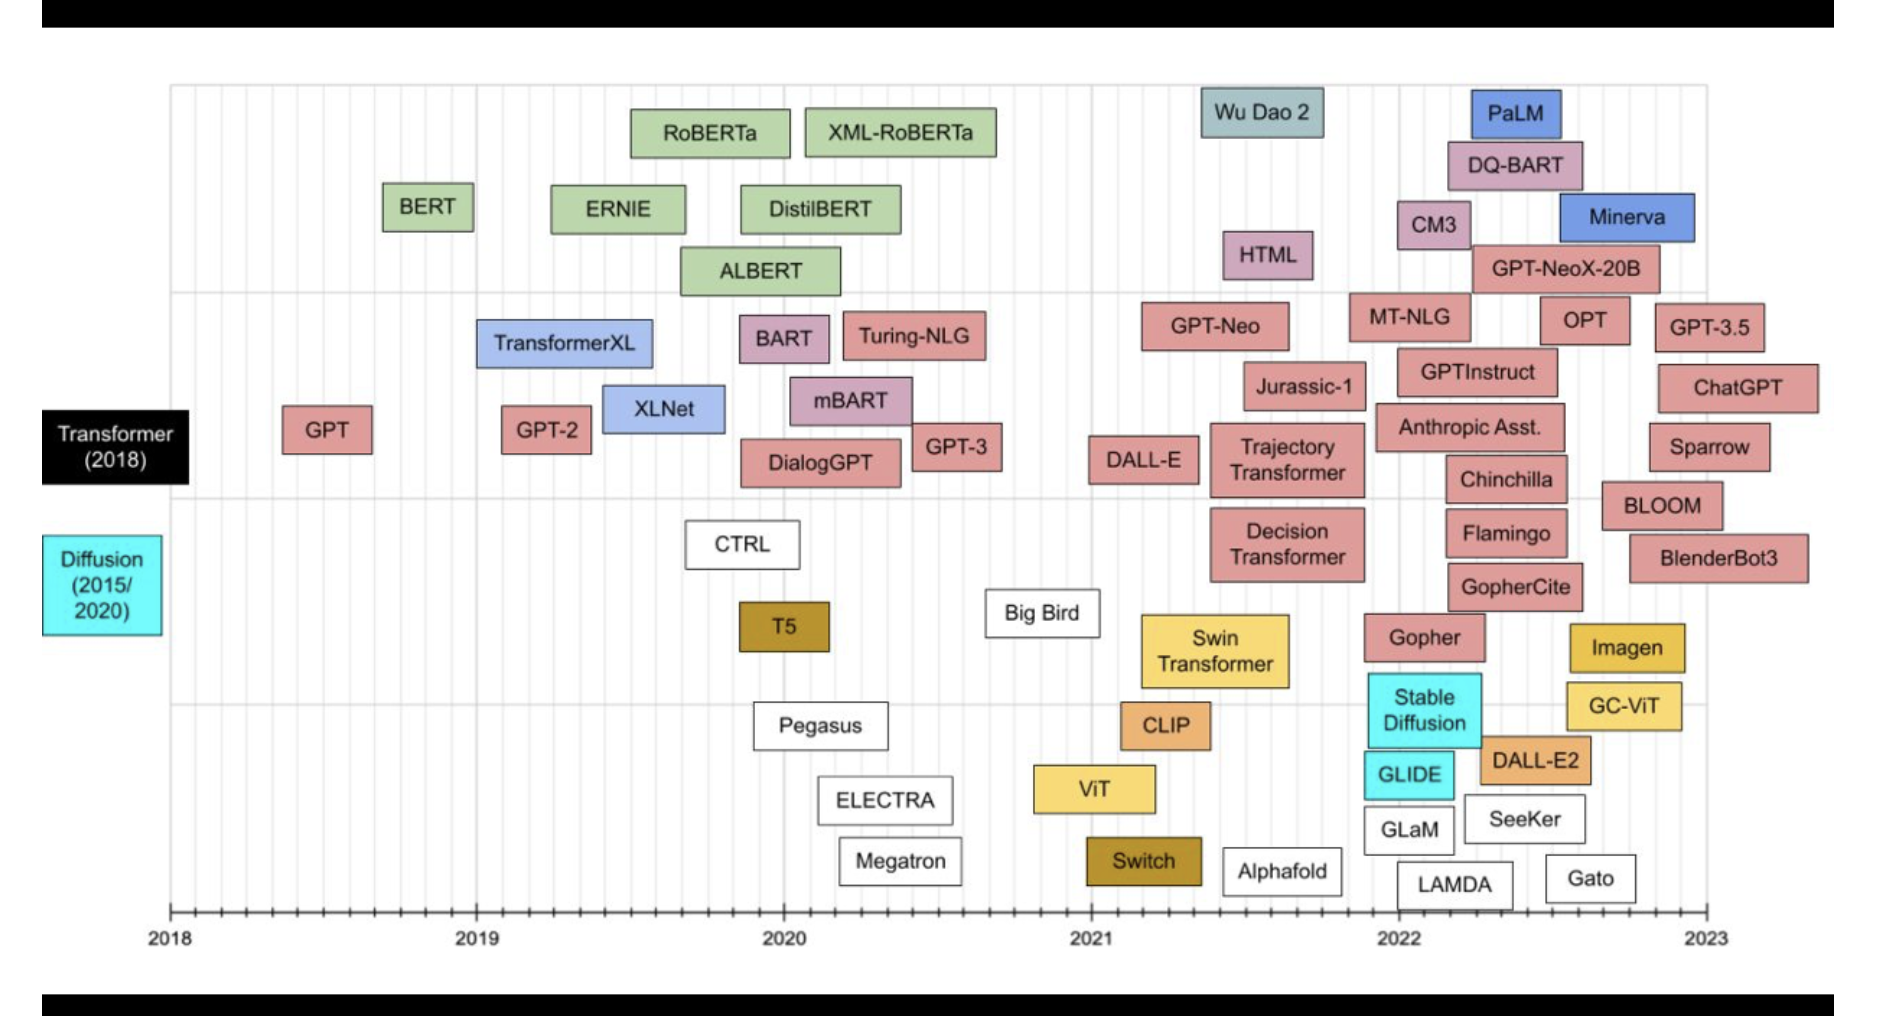

# Sentiment Analysis
- Given some text, is it positive or negative?

In [3]:
classifier = pipeline("sentiment-analysis")

No model was supplied, defaulted to distilbert-base-uncased-finetuned-sst-2-english and revision af0f99b (https://huggingface.co/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.


Downloading:   0%|          | 0.00/268M [00:00<?, ?B/s]

KeyboardInterrupt: 

In [26]:
sentences = [
    "This movie was amazing!",
    "We hope you don't hate it.",
    "This was a really bad movie!"
]

In [27]:
results = classifier(sentences)

for sentence, result in zip(sentences, results):
    print("Sentence: {} \t\t Result: {}".format(sentence, result))

Sentence: This movie was amazing! 		 Result: {'label': 'POSITIVE', 'score': 0.9998800754547119}
Sentence: We hope you don't hate it. 		 Result: {'label': 'NEGATIVE', 'score': 0.5308545231819153}
Sentence: This was a really bad movie! 		 Result: {'label': 'NEGATIVE', 'score': 0.9997768998146057}


# Question Answering
- Given some context, answer a question.

In [28]:
context = (
    "Lorem Ipsum is simply dummy text of the printing and typesetting industry. "
    "Lorem Ipsum has been the industry's standard dummy text ever since the 1500s, when an unknown printer took "
    "a galley of type and scrambled it to make a type specimen book. It has survived not only five centuries, but "
    "also the leap into electronic typesetting, remaining essentially unchanged. It was popularised in the "
    "1960s with the release of Letraset sheets containing Lorem Ipsum passages, and more recently with desktop "
    "publishing software like Aldus PageMaker including versions of Lorem Ipsum."
)

In [29]:
questions = [
    "What is Lorem Ipsum?",
    "Since when was it the indutry standard?",
    "How did Lorem Ipsum come to be?",
    "When did it become popular again?",
    "When were Letraset sheets cotaining Lorem Ipsum put out?"
]

In [30]:
# Distilled BERT
question_answering = pipeline("question-answering")

No model was supplied, defaulted to distilbert-base-cased-distilled-squad (https://huggingface.co/distilbert-base-cased-distilled-squad)


In [32]:
question_answering({
    'question' : "When were Letraset sheets cotaining Lorem Ipsum put out?",
    'context' : context
})

{'score': 0.6828820109367371, 'start': 393, 'end': 398, 'answer': '1960s'}

In [33]:
# T5
text2text_generator = pipeline("text2text-generation")

No model was supplied, defaulted to t5-base (https://huggingface.co/t5-base)


In [34]:
text2text_generator("question: What is 42 ? context: 42 is the answer to life, the universe and everything")

[{'generated_text': 'the answer to life, the universe and everything'}]

# Summarization
- Given some long text, write a short summary.

In [35]:
context = (
    "Lorem Ipsum is simply dummy text of the printing and typesetting industry. "
    "Lorem Ipsum has been the industry's standard dummy text ever since the 1500s, when an unknown printer took "
    "a galley of type and scrambled it to make a type specimen book. It has survived not only five centuries, but "
    "also the leap into electronic typesetting, remaining essentially unchanged. It was popularised in the "
    "1960s with the release of Letraset sheets containing Lorem Ipsum passages, and more recently with desktop "
    "publishing software like Aldus PageMaker including versions of Lorem Ipsum."
)

In [38]:
summarizer = pipeline("summarization", max_length=60)

No model was supplied, defaulted to sshleifer/distilbart-cnn-12-6 (https://huggingface.co/sshleifer/distilbart-cnn-12-6)


In [39]:
summarizer(context, min_length=5, do_sample=False)

[{'summary_text': " Lorem Ipsum has been the industry's standard dummy text ever since the 1500s . It was popularised in the 1960s with the release of Letraset sheets containing Lorem Ipsum passages ."}]

# Text Generation
- Generate some text given some context or from scratch.

In [40]:
generator = pipeline(model="gpt2")

Downloading:   0%|          | 0.00/6.69k [00:00<?, ?B/s]

In [41]:
# These parameters will return suggestions, and only the newly created text making it easier for prompting suggestions.
generator("I love going to the", num_return_sequences=4, return_full_text=True)

The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


[{'generated_text': "I love going to the grocery store when I'm eating my veggies, I keep them tucked into my food bowls and pick them up, and sometimes my meals just aren't going to make it into the rotation. No worries when it comes to the gluten"},
 {'generated_text': "I love going to the airport at night or in the morning because I get to work in front of the TV at 8:30 p.m. at most.\n\nBut I'd have to sit down for about 12 hours to have dinner and"},
 {'generated_text': 'I love going to the concerts."\n\nHe added: "If I was there this day on the balcony, I\'d just look up and see my own children.'},
 {'generated_text': 'I love going to the gym, especially with my trainer. I always have been interested in them, and I\'m more of an aerobic competitor. I also play better defense at times, so I am an excellent athlete."\n\nFerguson added:'}]